In [1]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictions.

In [2]:
# !pip install --upgrade pandas-datareader
# !pip install yfinance

In [3]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override()

df = web.get_data_yahoo('MSFT', start='2017-01-01', end='2023-09-10')

# Display data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.138733,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.883072,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.883072,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.376118,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.193520,20382700
...,...,...,...,...,...,...
2023-09-01,331.309998,331.989990,326.779999,328.660004,327.994293,14931200
2023-09-05,329.000000,334.850006,328.660004,333.549988,332.874359,18553900
2023-09-06,333.380005,334.459991,330.179993,332.880005,332.205750,17535800


In [5]:
# Retrieve matrix dimensions

df.shape

(1682, 6)

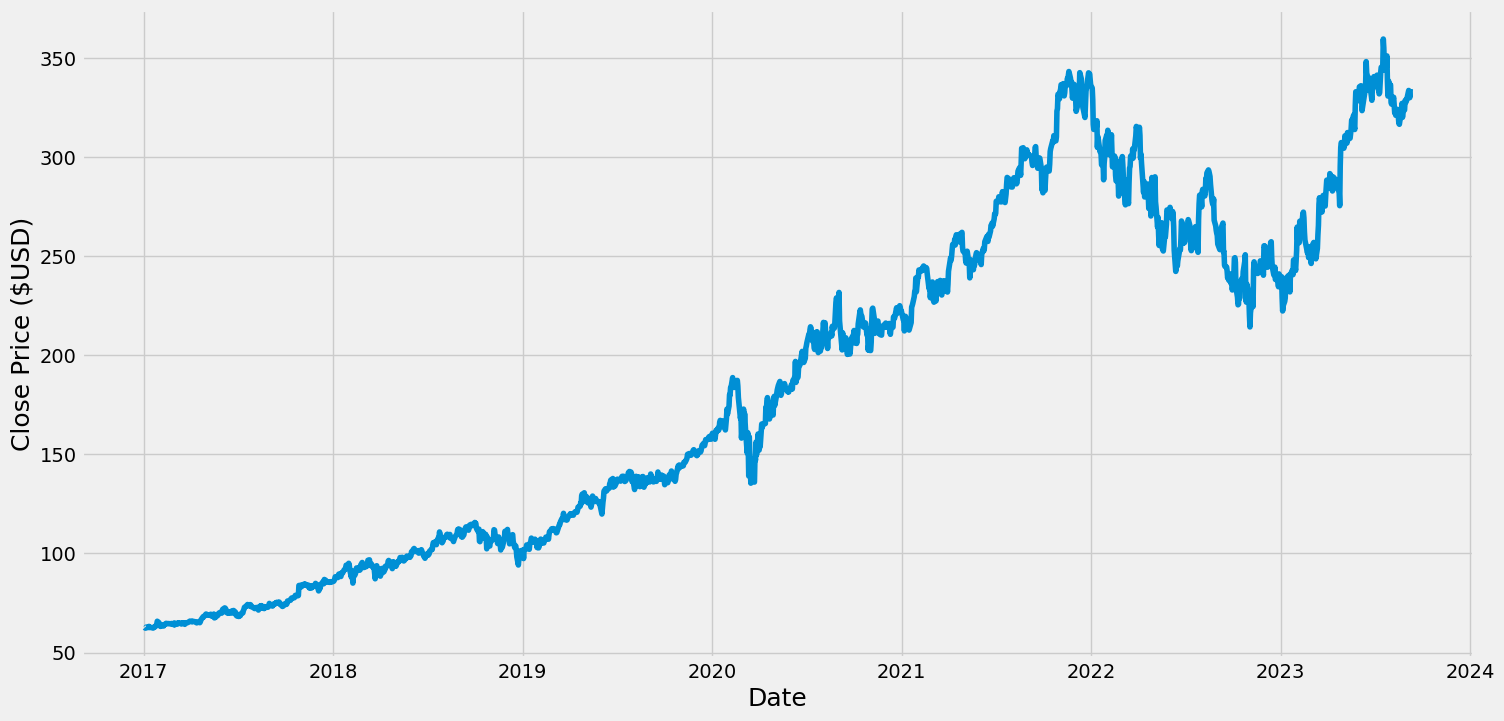

In [6]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [7]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

1346


In [8]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.00094217],
       [0.        ],
       [0.        ],
       ...,
       [0.91046137],
       [0.90046776],
       [0.91513846]])

In [9]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00094217, 0.        , 0.        , 0.00181702, 0.00114405,
       0.00107675, 0.00299472, 0.00104311, 0.00134595, 0.00077391,
       0.00067297, 0.        , 0.00148054, 0.0022208 , 0.00410512,
       0.0046435 , 0.00662875, 0.01170968, 0.00952252, 0.00790741,
       0.00430702, 0.00292742, 0.0046435 , 0.0045089 , 0.00380229,
       0.00349945, 0.00592213, 0.00572025, 0.00814295, 0.00763821,
       0.00750362, 0.00746996, 0.00780647, 0.00736902, 0.0069316 ,
       0.00780647, 0.00780647, 0.00649418, 0.00565295, 0.00888322,
       0.0057539 , 0.00656146, 0.00662875, 0.00706619, 0.00905144,
       0.0081766 , 0.00884956, 0.00810929, 0.00709985, 0.00824389,
       0.00787375, 0.00864768, 0.00884956, 0.00642686, 0.00918604,
       0.00864768, 0.00901781, 0.00942158, 0.01006091, 0.01066658])]
[0.011474140955988393]

[array([0.00094217, 0.        , 0.        , 0.00181702, 0.00114405,
       0.00107675, 0.00299472, 0.00104311, 0.00134595, 0.00077391,
       0.00067297, 0.        , 0.0

In [10]:
# Convert x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1286, 60, 1)

In [12]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False)) 
model.add(Dense(32))

model.add(Dense(1))


In [13]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(optimizer='adam', loss='mean_absolute_error')



In [14]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1286/1286 [==============================] - 16s 12ms/step - loss: 0.0027
Epoch 2/2
1286/1286 [==============================] - 15s 12ms/step - loss: 8.2092e-04


In [15]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [16]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [17]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [18]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions.shape

11/11 [==============================] - 0s 9ms/step


(336, 1)

In [19]:
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)

In [20]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

14.864448592776345


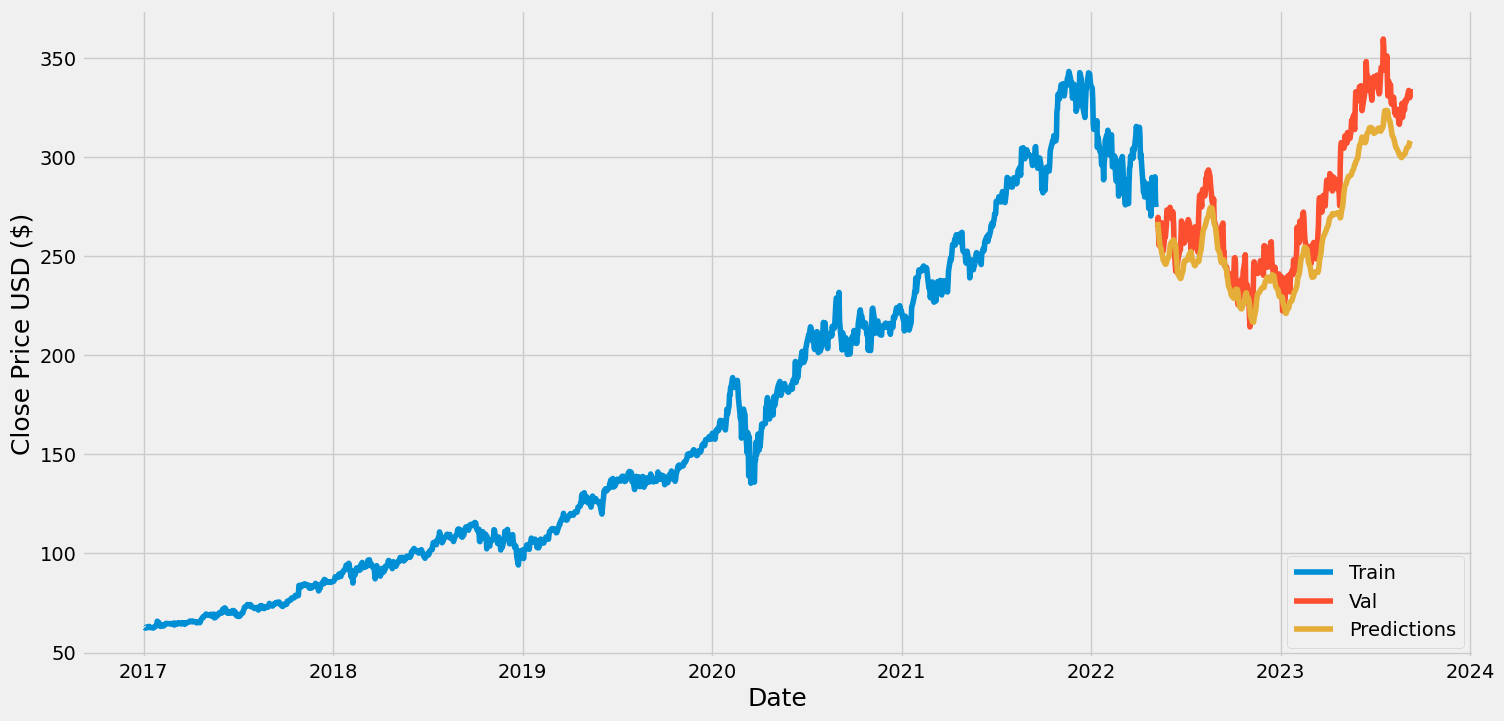

In [21]:
# Plot the data

train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2022-05-09,264.579987,267.247070
2022-05-10,269.500000,264.807709
2022-05-11,260.549988,262.497833
2022-05-12,255.350006,259.500854
2022-05-13,261.119995,255.972305
...,...,...
2023-09-01,328.660004,304.517914
2023-09-05,333.549988,305.285004
2023-09-06,332.880005,306.450256


In [23]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('MSFT', start='2012-01-01', end='2023-09-05')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))
# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 14ms/step
[[305.285]]


In [24]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('MSFT', start='2023-09-02', end='2023-09-07')
print(actual_apple_quote['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-09-05    333.549988
2023-09-06    332.880005
Name: Close, dtype: float64


In [25]:
## Below code added as of 1/1/2023

In [26]:
# Calculate confusion matrix from actual and predicted values

y_actual = y_test
y_hat = predictions

overshot = 0
undershot = 0


for i in range(0, len(y_actual)):
  if y_actual[i] > y_hat[i]:
    undershot+=1
  else:
    overshot+=1


print(np.average(y_actual-y_hat))
print(overshot, undershot)



14.864448592776345
18 318


In [97]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('MSFT', start='2012-01-01', end='2023-09-05')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))


####
# Use input[0:59] to predict output[0]. Append output[0] to list of outputs
# Then, use input[1:59] concatenated with output[0] to predict output[1]. Append output[1] to list of outputs
# Then, use input[2:59] concatenated with output[0:1] to predict output[2]. Append output[2] to list of outputs

predicted_prices = []
inputs = new_x_test

# Forecast next 10 market day closing prices. Use previous predictions as part of input for subsequent predictions.
for i in range(0, 10):
    # Predict with updated inputs
    pred_price = model.predict(inputs)
    predicted_prices.append(scaler.inverse_transform(pred_price))

    # Add next input
    new_x_inputs = np.append(inputs,pred_price)    
    new_x_inputs = np.array([new_x_inputs[1:len(new_x_inputs)]])
    new_x_inputs = np.reshape(new_x_inputs, (new_x_test.shape[0], new_x_test.shape[1], 1))
    inputs = new_x_inputs

print(np.array(predicted_prices))
    
    
    

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 14ms/step
[[[305.285  ]]

 [[303.2064 ]]

 [[299.81638]]

 [[295.80157]]

 [[291.53976]]

 [[287.2362 ]]

 [[283.00125]]

 [[278.89215]]

 [[274.9361 ]]

 [[271.1435 ]]

 [[267.51495]]

 [[264.04578]]

 [[260.72818]]

 [[257.55328]]

 [[254.51128]]

 [[251.59279]]

 [[248.78876]]

 [[246.0907 ]]

 [[243.49083]]

 [[240.98216]]

 [[238.55847]]

 [[236.21411]]

 [[233.94418]]

 [[231.74432]]

 [[229.61066]]

 [[227.53973]]

 [[225.52855]]

 [[223.57445]]

 [[221.6749 ]]

 [[219.82774]]

 [[218.03102]]

 [[216.28279]]

 [[214.58147]]

 [[212.92545]]

 [[211.31316]]

 [[209.7433 ]]

 [[208.2145 ]]

 [[206.72545]]

 [[205.27501]]

 [[203.86195]]

 [[202.48518]]

 [[201.14365]]

 [[199.83626]]

 [[198.562  ]]

 [[197.31995]]

 [[196.1091 ]]

 [[194.92862]]

 [[193.77753]]

 [[192.65509]]

 [[191.56044]]

 [[190.49272]]

 [[189.45125]]

 [[188.43524]]

 [[187.444  ]]

 [[186.47679]]


In [98]:
# Gather actual next 10 closing prices to compare

actual_forecast_prices=web.get_data_yahoo('MSFT', start='2023-09-06', end='2023-12-12')
print(actual_forecast_prices['Close'])


[*********************100%%**********************]  1 of 1 completed
Date
2023-09-06    332.880005
2023-09-07    329.910004
2023-09-08    334.269989
2023-09-11    337.940002
2023-09-12    331.769989
                 ...    
2023-12-05    372.519989
2023-12-06    368.799988
2023-12-07    370.950012
2023-12-08    374.230011
2023-12-11    371.299988
Name: Close, Length: 68, dtype: float64


In [ ]:
# LSTM converges towards bias when forecasting with inputs. Next step is comparing to predicting series instead of singular output